<h1 align=center><font size = 6>Airport Flight Delay Analysis</font></h1>

## Introduction

In this project, we will analyze the airline data set and gain insight into the airline industry. To do that, we will work with a Python visualization library, namely **plotly**. We will use the visualizions we create in **plotly** to create a web app using **flask** that will display the visualtions and insights gained from our exploration.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Datasets](#0)
2. [Downloading and Prepping Data](#2)<br>
3. [Data Exploration](#4) <br>
4. [Plotly](#6)<br>
4. [SQL](#8) <br>
5. [Web App](#10) <br>
</div>
<hr>

# Datasets<a id="0"></a>

Toolkits: This project heavily relies on [*pandas*](http://pandas.pydata.org/) and [**Numpy**](http://www.numpy.org/) for data wrangling, analysis, and visualization. The primary plotting library we will explore is [**Plotly**](https://plot.ly/).

Datasets: 

1. U.S Airline Delay and Cancellation Data from 2009 to 2018 - [Airline Delay Data](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/) from the Kaggle public data. The dataset is derived from the Department of Transportaions flight info of US domestic flights. Updated yearly, showing data for the entire years of 2009 to 2018. 


2. Airline Data - [Airline Data](https://www.kaggle.com/open-flights/airline-database) from the Kaggle public data website. The dataset contains a database of over 5000 airlines. The data presents airline name, IATA id, callsign, and country.


3. International IATA Airports Data - [Airport Data](https://rapidapi.com/easypnr/api/world-iata-airports) from Rapid API. The dataset consists of reliable airports list and details, with IATA codes. The Data is accessed through an API call. 

# Downloading and Prepping Data <a id="2"></a>

In [1]:
# Dependencies
import json
import pandas as pd
import matplotlib as plt
import numpy as np
from config import headers_airport

### Airport Data
<a class="anchor" id="airport_code"></a>

In [2]:
import requests 

url = "https://airports-iata.p.rapidapi.com/airports"

response = requests.request("GET", url, headers=headers_airport)

airport_data = response.json()

airport_data

[{'locationName': 'Anaa Airport',
  'location': 'Anaa, Tuamotus',
  'country': 'French Polynesia',
  'iataCode': 'AAA'},
 {'locationName': 'Arrabury Airport',
  'location': 'Arrabury, Queensland',
  'country': 'Australia',
  'iataCode': 'AAB'},
 {'locationName': 'El Arish International Airport',
  'location': 'El Arish',
  'country': 'Egypt',
  'iataCode': 'AAC'},
 {'locationName': 'Ad-Dabbah Airport',
  'location': 'Al Dabbah',
  'country': 'Sudan',
  'iataCode': 'AAD'},
 {'locationName': 'Rabah Bitat Airport (Les Salines Airport)',
  'location': 'Annaba',
  'country': 'Algeria',
  'iataCode': 'AAE'},
 {'locationName': 'Apalachicola Municipal Airport',
  'location': 'Apalachicola, Florida',
  'country': 'United States',
  'iataCode': 'AAF'},
 {'locationName': 'Arapoti Airport',
  'location': 'Arapoti, Paraná',
  'country': 'Brazil',
  'iataCode': 'AAG'},
 {'locationName': 'Merzbrück Airport',
  'location': 'Aachen',
  'country': 'Germany',
  'iataCode': 'AAH'},
 {'locationName': 'Arra

In [18]:
# Load data into Pandas df
df_airport = pd.DataFrame(airport_data)

In [19]:
df_airport = pd.read_csv("Data/Airport_Data.csv")

In [20]:
# Keep only the U.S. airports
df_USAirports = df_airport[df_airport['country'] == 'United States']
df_USAirports.head()

# Keep only the 'Airports'
df_USAirports = df_USAirports[df_USAirports['locationName'].apply(lambda x: 'Airport' in x)]

# drop columns
df_USAirports = df_USAirports.drop(['Unnamed: 0'], axis=1)

In [21]:
df_USAirports.head()

,locationName,location,country,iataCode
5,Apalachicola Municipal Airport,"Apalachicola, Florida",United States,AAF
29,Lehigh Valley International Airport,"Allentown, Pennsylvania",United States,ABE
33,Abilene Regional Airport,"Abilene, Texas",United States,ABI
36,Ambler Airport,"Ambler, Alaska",United States,ABL
42,Aberdeen Regional Airport,"Aberdeen, South Dakota",United States,ABR


### Airline Code Data

In [22]:
# read airlines data into pandas data frame
df_airline = pd.read_csv('data/airlines.csv')

# Delete/rename columns
df_airline = df_airline.drop(['Airline ID', 'Alias', 'Active', 'Country', 'Callsign', 'ICAO'], axis=1)

# Rename Column
df_airline = df_airline.rename(columns={"Name":"AIRLINE_NAME"})

In [23]:
df_airline.head()

,AIRLINE_NAME,IATA
0,Unknown,-
1,Private flight,-
2,135 Airways,NaN
3,1Time Airline,1T
4,2 Sqn No 1 Elementary Flying Training School,NaN


### Airport Delay Data

In [24]:
# Read the Airport data from 2015 - 2018 into a pandas dataframe then combine into one df
df_2018 = pd.read_csv('Data/2018.csv')
df_2017 = pd.read_csv('Data/2017.csv')
df_2016 = pd.read_csv('Data/2016.csv')
df_2015 = pd.read_csv('Data/2015.csv')

df_delay = pd.concat([df_2018, df_2017, df_2016, df_2015])

In [25]:
df_delay.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Drop and rename columns in the df
df_delay = df_delay.drop(['CANCELLATION_CODE', 'Unnamed: 27'], axis=1)

df_delay = df_delay.rename(columns={"FL_DATE":"FLIGHT_DATE",
                                    "OP_CARRIER":"AIRLINE",
                                    "OP_CARRIER_FL_NUM":"FLIGHT_NUMBER",
                                    "CRS_DEP_TIME": "SCHEDULED_DEP", 
                                    "CRS_ARR_TIME":"SCHEDULED_ARR", 
                                    "CRS_ELAPSED_TIME":"SCHEDULED_ELAPSED_TIME",
                                   })

# Repalce Nan values with 0
df_delay['CARRIER_DELAY'] = df_delay['CARRIER_DELAY'].replace(np.nan, 0)
df_delay['WEATHER_DELAY'] = df_delay['WEATHER_DELAY'].replace(np.nan, 0)
df_delay['NAS_DELAY'] = df_delay['NAS_DELAY'].replace(np.nan, 0)
df_delay['SECURITY_DELAY'] = df_delay['SECURITY_DELAY'].replace(np.nan, 0)
df_delay['LATE_AIRCRAFT_DELAY'] = df_delay['LATE_AIRCRAFT_DELAY'].replace(np.nan, 0)

# Convert to Datetime object
df_delay['FLIGHT_DATE'] = pd.to_datetime(pd.Series(df_delay['FLIGHT_DATE']), format="%Y/%m/%d")

MERGE DATASETS

In [27]:
# Merge DataSets
df = pd.merge(df_delay, df_airline, how='left', left_on=['AIRLINE'], right_on=['IATA'])
df = pd.merge(df, df_USAirports, how='left', left_on=['ORIGIN'], right_on=['iataCode'])
df = pd.merge(df, df_USAirports, how='left', left_on=['DEST'], right_on=['iataCode'])

df = df.rename(columns={"locationName_x":"ORIGIN_NAME",
                        "location_x":"ORIGIN_LOCATION",
                        "locationName_y": "DEST_NAME", 
                        "location_y":"DEST_LOCATION", 
                        })

df = df.drop(['IATA', 'country_x', 'iataCode_x', 'country_y', 'iataCode_y'], axis=1)

df = df[['FLIGHT_DATE', 
         'AIRLINE',
         'AIRLINE_NAME',
         'FLIGHT_NUMBER', 
         'ORIGIN',
         'ORIGIN_NAME',
         'ORIGIN_LOCATION',
         'DEST',
         'DEST_NAME',
         'DEST_LOCATION',
         'SCHEDULED_DEP',
         'DEP_TIME', 
         'DEP_DELAY', 
         'TAXI_OUT', 
         'WHEELS_OFF',
         'WHEELS_ON', 
         'TAXI_IN', 
         'SCHEDULED_ARR', 
         'ARR_TIME', 
         'ARR_DELAY',
         'CANCELLED', 
         'DIVERTED', 
         'SCHEDULED_ELAPSED_TIME',
         'ACTUAL_ELAPSED_TIME', 
         'AIR_TIME', 
         'DISTANCE', 
         'CARRIER_DELAY',
         'WEATHER_DELAY', 
         'NAS_DELAY', 
         'SECURITY_DELAY', 
         'LATE_AIRCRAFT_DELAY',
         'IATA',  
         'country_x',
         'iataCode_x',   
         'country_y', 
         'iataCode_y']]

KeyError: "['IATA' 'country_x' 'iataCode_x' 'country_y' 'iataCode_y'] not in index"

In [28]:
# Year variable
df['FLIGHT_DATE_Y'] = pd.to_datetime(df['FLIGHT_DATE']).dt.year
# Month variable
df['FLIGHT_DATE_M'] = pd.to_datetime(df['FLIGHT_DATE']).dt.month
# Weekday variable
df['FLIGHT_DATE_D'] = pd.to_datetime(df['FLIGHT_DATE']).dt.weekday_name

In [29]:
# Set to see all columns
pd.set_option('display.max_columns', None)
df.head()

,FLIGHT_DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN,DEST,SCHEDULED_DEP,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARR,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME,ORIGIN_NAME,ORIGIN_LOCATION,DEST_NAME,DEST_LOCATION,FLIGHT_DATE_Y,FLIGHT_DATE_M,FLIGHT_DATE_D
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,United Airlines,Newark Liberty International Airport,"Newark/Elizabeth, New Jersey",Denver International Airport,"Denver, Colorado",2018,1,Monday
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,United Airlines,McCarran International Airport,"Las Vegas, Nevada",San Francisco International Airport,"San Francisco, California",2018,1,Monday
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,United Airlines,John Wayne Airport (Orange County Airport),"Santa Ana, California",Denver International Airport,"Denver, Colorado",2018,1,Monday
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,United Airlines,Southwest Florida International Airport,"Fort Myers, Florida",O'Hare International Airport (formerly Orchard...,"Chicago, Illinois",2018,1,Monday
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,United Airlines,O'Hare International Airport (formerly Orchard...,"Chicago, Illinois",Albany International Airport,"Albany, New York",2018,1,Monday


# Data Exploration <a id="4"></a>

In [30]:
# Total number of canceled flights: 2015-2018
print("Total number of canceled flights 2015-2018: " + str(df.CANCELLED.sum()) + "\n")

# Total number of canceled flights by year
print("Total number of canceled flights 2018: " + str(df[df.FLIGHT_DATE.dt.year == 2018].CANCELLED.sum()))
print("Total number of canceled flights 2017: " + str(df[df.FLIGHT_DATE.dt.year == 2017].CANCELLED.sum()))
print("Total number of canceled flights 2016: " + str(df[df.FLIGHT_DATE.dt.year == 2016].CANCELLED.sum()))
print("Total number of canceled flights 2015: " + str(df[df.FLIGHT_DATE.dt.year == 2015].CANCELLED.sum()))


Total number of canceled flights 2015-2018: 355022.0

Total number of canceled flights 2018: 116584.0
Total number of canceled flights 2017: 82693.0
Total number of canceled flights 2016: 65861.0
Total number of canceled flights 2015: 89884.0


In [31]:
# let's see how it looks like with just cancelled
canceled = df[(df['CANCELLED'] > 0)]
canceled.head(3)

,FLIGHT_DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN,DEST,SCHEDULED_DEP,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARR,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME,ORIGIN_NAME,ORIGIN_LOCATION,DEST_NAME,DEST_LOCATION,FLIGHT_DATE_Y,FLIGHT_DATE_M,FLIGHT_DATE_D
178,2018-01-01,UA,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1.0,0.0,81.0,NaN,NaN,316.0,0.0,0.0,0.0,0.0,0.0,United Airlines,George Bush Intercontinental Airport,"Houston, Texas",McAllen-Miller International Airport,"McAllen, Texas",2018,1,Monday
875,2018-01-01,UA,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1.0,0.0,102.0,NaN,NaN,414.0,0.0,0.0,0.0,0.0,0.0,United Airlines,McCarran International Airport,"Las Vegas, Nevada",San Francisco International Airport,"San Francisco, California",2018,1,Monday
1244,2018-01-01,UA,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1.0,0.0,78.0,NaN,NaN,316.0,0.0,0.0,0.0,0.0,0.0,United Airlines,McAllen-Miller International Airport,"McAllen, Texas",George Bush Intercontinental Airport,"Houston, Texas",2018,1,Monday


In [32]:
# filter all negative numbers in ARR_DELAY column
# Number of delayed flights 
df[df.ARR_DELAY > 0 ].count()

FLIGHT_DATE               8432278
AIRLINE                   8432278
FLIGHT_NUMBER             8432278
ORIGIN                    8432278
DEST                      8432278
SCHEDULED_DEP             8432278
DEP_TIME                  8432278
DEP_DELAY                 8431081
TAXI_OUT                  8432278
WHEELS_OFF                8432278
WHEELS_ON                 8432278
TAXI_IN                   8432278
SCHEDULED_ARR             8432278
ARR_TIME                  8432278
ARR_DELAY                 8432278
CANCELLED                 8432278
DIVERTED                  8432278
SCHEDULED_ELAPSED_TIME    8432278
ACTUAL_ELAPSED_TIME       8432277
AIR_TIME                  8432277
DISTANCE                  8432278
CARRIER_DELAY             8432278
WEATHER_DELAY             8432278
NAS_DELAY                 8432278
SECURITY_DELAY            8432278
LATE_AIRCRAFT_DELAY       8432278
AIRLINE_NAME              8432278
ORIGIN_NAME               8174865
ORIGIN_LOCATION           8174865
DEST_NAME     

In [33]:
# Filter out non-delayed flights < 0 DEP_DELAY
df_delay = df[(df['ARR_DELAY'] > 0)]
df_delay.head()

,FLIGHT_DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN,DEST,SCHEDULED_DEP,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARR,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME,ORIGIN_NAME,ORIGIN_LOCATION,DEST_NAME,DEST_LOCATION,FLIGHT_DATE_Y,FLIGHT_DATE_M,FLIGHT_DATE_D
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,United Airlines,O'Hare International Airport (formerly Orchard...,"Chicago, Illinois",Albany International Airport,"Albany, New York",2018,1,Monday
11,2018-01-01,UA,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,112.0,8.0,2311,120.0,129.0,0.0,0.0,72.0,80.0,48.0,316.0,121.0,0.0,8.0,0.0,0.0,United Airlines,O'Hare International Airport (formerly Orchard...,"Chicago, Illinois",Cleveland Hopkins International Airport,"Cleveland, Ohio",2018,1,Monday
14,2018-01-01,UA,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,123.0,5.0,15,128.0,73.0,0.0,0.0,121.0,118.0,99.0,763.0,0.0,11.0,0.0,0.0,62.0,United Airlines,O'Hare International Airport (formerly Orchard...,"Chicago, Illinois",Burlington International Airport,"Burlington, Vermont",2018,1,Monday
15,2018-01-01,UA,2412,MCO,LAX,653,747.0,54.0,14.0,801.0,1003.0,22.0,930,1025.0,55.0,0.0,0.0,337.0,338.0,302.0,2218.0,54.0,0.0,1.0,0.0,0.0,United Airlines,Orlando International Airport,"Orlando, Florida",Los Angeles International Airport,"Los Angeles, California",2018,1,Monday
16,2018-01-01,UA,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,2157.0,4.0,2136,2201.0,25.0,0.0,0.0,386.0,339.0,319.0,2500.0,7.0,0.0,0.0,0.0,18.0,United Airlines,Newark Liberty International Airport,"Newark/Elizabeth, New Jersey",Sacramento International Airport,"Sacramento, California",2018,1,Monday


In [34]:
df.ORIGIN_NAME.unique()

array(['Newark Liberty International Airport',
       'McCarran International Airport',
       'John Wayne Airport (Orange County Airport)',
       'Southwest Florida International Airport',
       "O'Hare International Airport (formerly Orchard Depot Field)",
       'George Bush Intercontinental Airport',
       'Denver International Airport', 'Sacramento International Airport',
       'Richmond International Airport', 'Portland International Airport',
       'Orlando International Airport', 'McGhee Tyson Airport',
       'San Francisco International Airport', 'Jackson Hole Airport',
       'Logan International Airport',
       'Louis Armstrong New Orleans International Airport (formerly Moisant Field)',
       'Miami International Airport',
       'Seattle–Tacoma International Airport',
       'San Antonio International Airport',
       'Salt Lake City International Airport',
       'Raleigh–Durham International Airport',
       'Fort Lauderdale–Hollywood International Airport',
    

In [35]:
a = pd.DataFrame(df.groupby('AIRLINE_NAME').CANCELLED.sum())
a

,CANCELLED
AIRLINE_NAME,
Alaska Airlines,5199.0
Allegiant Air,769.0
American Airlines,48869.0
American Eagle Airlines,25680.0
Atlantic Southeast Airlines,42756.0
Comair,11870.0
Delta Air Lines,20428.0
Frontier Airlines,5061.0
Hawaiian Airlines,769.0


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

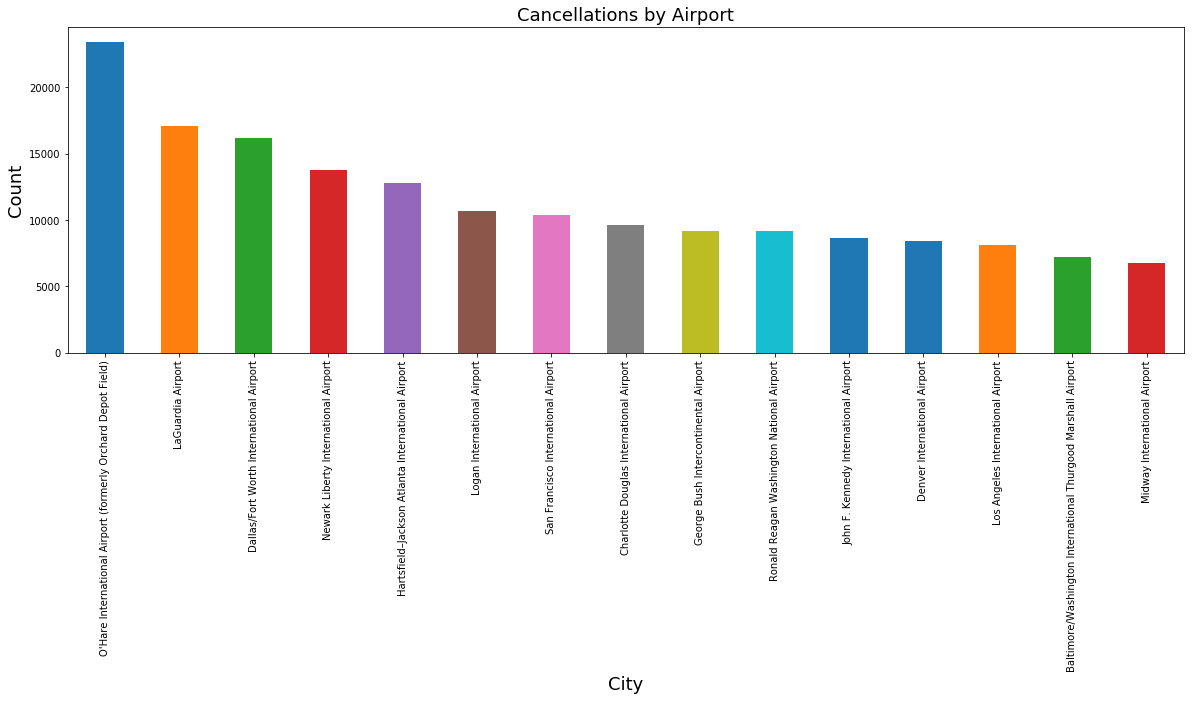

In [37]:
# Cancellations by Airport
city_by_cancelled = df.groupby('ORIGIN_NAME').CANCELLED.sum().sort_values(ascending=False) # Sort
plt.figure(figsize=(20, 6))
city_by_cancelled[:15].plot.bar() # Show 15
plt.title('Cancellations by Airport', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

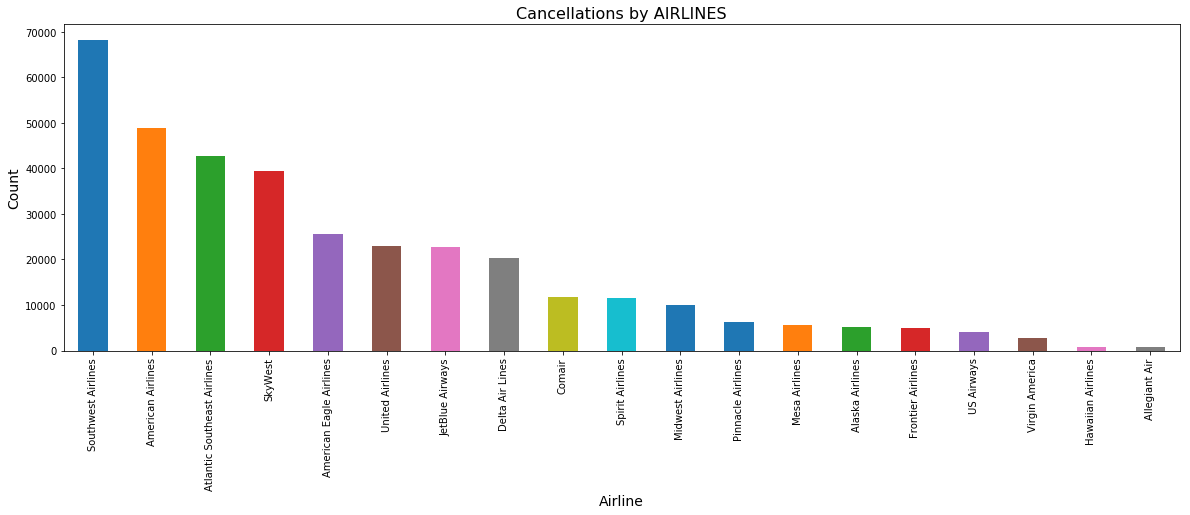

In [38]:
# Cancellations by airlines
plt.figure(figsize=(20, 6))
df.groupby('AIRLINE_NAME').CANCELLED.sum().sort_values(ascending=False).plot.bar()
plt.title('Cancellations by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

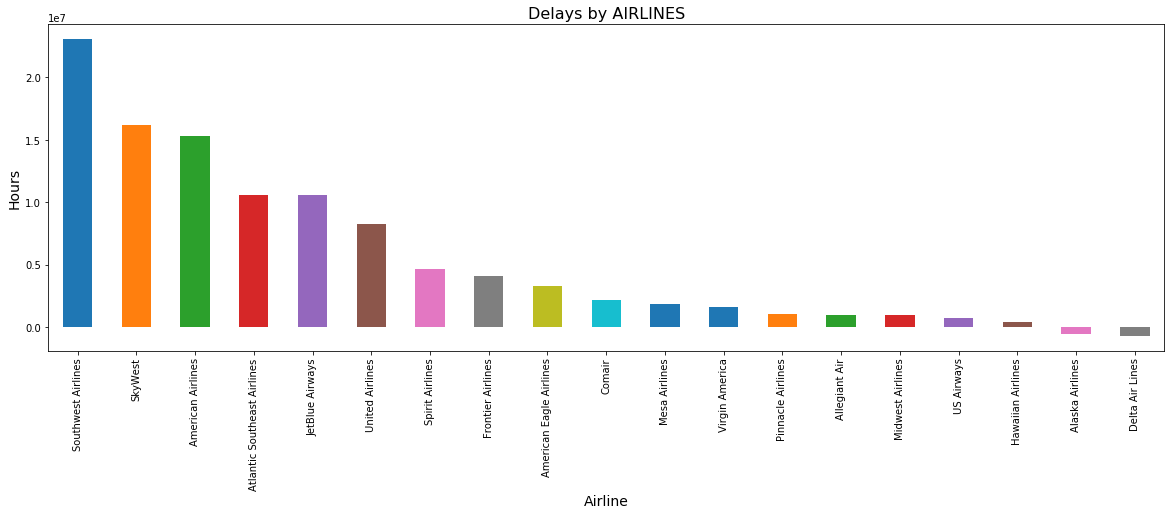

In [25]:
# Delays by airlines
plt.figure(figsize=(20, 6))
df.groupby('AIRLINE_NAME').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

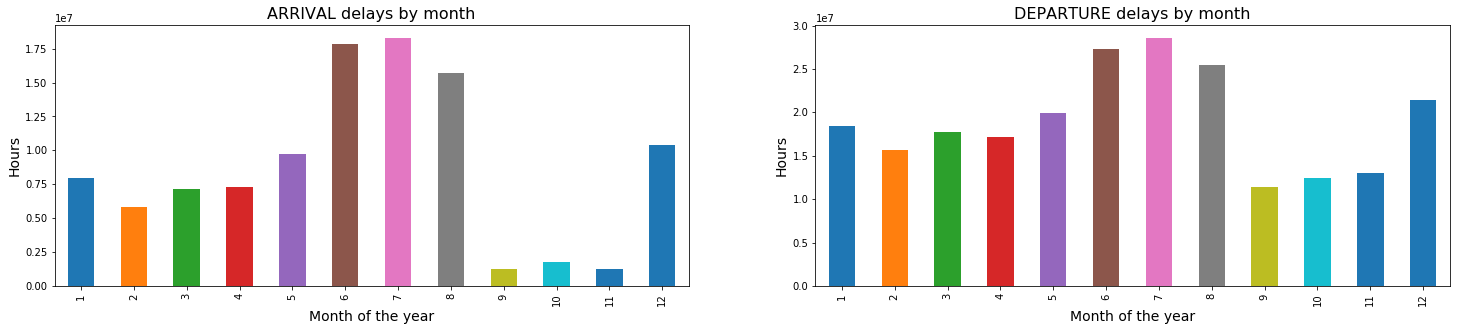

In [39]:
# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,2)
df.groupby('FLIGHT_DATE_M').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,1)
df.groupby('FLIGHT_DATE_M').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()


# Plotly <a id="6"></a>

In [40]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
from ipyaggrid import Grid

pio.templates.default = "plotly_dark" #"plotly_white"
#pio.templates.default = "plotly_white"

#jupyter labextension install @jupyterlab/plotly-extension

plotly.offline.init_notebook_mode(connected=True)

# --------------------------------------------------------------
# -- FUNCTION TO PRODUCE LINE PLOT -----------------------------
# --------------------------------------------------------------

def line_plot(df, group, value, agg_type, plot_title):
    
    agg_df = pd.DataFrame(df.groupby([group])[value].agg(agg_type)).reset_index()
    
    data = [go.Scatter(
                        x=agg_df.FLIGHT_DATE,
                        y=agg_df[value],
                        mode='lines+markers', #'lines',
                        name="'spline'",
                        line=dict(color='purple',width = 3),
                        marker=dict(size=9)
                        )]

    layout = go.Layout(title=plot_title)

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)
    
# --------------------------------------------------------------
# -- FUNCTION TO AIRLINE SCHOOL RANK ---------------------------
# --------------------------------------------------------------
    
def airline_rank_plot(df, top_x):
    
    airline_counts = pd.DataFrame(df.groupby('AIRLINE_NAME').CANCELLED.sum())
    airline_counts = airline_counts.reset_index()
    airline_counts.columns = ['AIRLINE','CANCELLED']
    airline_counts = airline_counts.nlargest(top_x, 'CANCELLED')
    airline_counts = airline_counts.sort_values(by='CANCELLED', ascending=True)

    trace = go.Scatter(x=airline_counts['CANCELLED'], 
                       y=airline_counts['AIRLINE'], 
                       marker=dict(color='purple', size=12), 
              mode='markers', 
              name='Number of Unique Students')

    data = [trace]

    layout = go.Layout(
        title="Top Airline Cancellations",
        xaxis=dict(
            title= 'Total number of cancellations',
            showgrid=False,
            showline=True,
            linecolor='rgb(102, 102, 102)',
            showticklabels=True,
            dtick=2,
            ticks='outside',
            tickcolor='rgb(102, 102, 102)'
        ),
        margin=dict(
            l=140,
            r=40,
            b=10,
            t=50
        ),
        legend=dict(
            font=dict(
                size=5
            ),
            yanchor='middle',
            xanchor='right',
        ),
        width=(800),
        height=(40 * top_x))


    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)
    
# --------------------------------------------------------------
# -- FUNCTION TO CREATE STACKED BAR PLOTS ----------------------
# --------------------------------------------------------------    

def monthly_stacked_bar(df, group_col, agg_col, agg, plot_title):
    
    group = df[group_col].unique()

    dfGroup = df.set_index('FLIGHT_DATE')

    dfGroup = pd.DataFrame(dfGroup.groupby([group_col, pd.Grouper(freq="M")])[agg_col].agg(agg)).reset_index()

    for i in group:
        if i == group[0]:
            fig = go.Figure(go.Bar(x=dfGroup['FLIGHT_DATE'], y=dfGroup[agg_col], name=i))
        else:
            fig.add_trace(go.Bar(x=dfGroup['FLIGHT_DATE'], y=dfGroup[agg_col], name=i))

    fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':group}, title=plot_title)
    fig.show()
    
def monthly_100stacked_bar(df, group_col, agg_col, agg, plot_title):
    
    group = df[group_col].unique()

    df_ts = df.set_index('FLIGHT_DATE')
    df_ts = df_ts.groupby([group_col, pd.Grouper(freq="M")])[agg_col].agg(agg)
    df_ts = pd.DataFrame(df_ts.groupby(level=[1]).apply(lambda x:100 * x / float(x.sum()))).reset_index()

    for i in group:
        if i == group[0]:
            fig = go.Figure(go.Bar(x=df_ts[df_ts[group_col] == i]['FLIGHT_DATE'], y=df_ts[df_ts[group_col] == i][agg_col], name=i))
        else:
            fig.add_trace(go.Bar(x=df_ts[df_ts[group_col] == i]['FLIGHT_DATE'], y=df_ts[df_ts[group_col] == i][agg_col], name=i))

    fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':group}, title=plot_title)
    fig.show() 
    
    
def double_bar_plots(df, group_col, agg_col, agg, plot_title_stack, plot_title_100):
    monthly_stacked_bar(df, group_col, agg_col, agg, plot_title_stack)
    #monthly_100stacked_bar(df, group_col, agg_col, agg, plot_title_100)


    

In [42]:
#def monthly_stacked_bar(df, group_col, agg_col, agg, plot_title)
    
group = df['FLIGHT_DATE_Y'].unique()

dfGroup = df.set_index('FLIGHT_DATE')

dfGroup = pd.DataFrame(dfGroup.groupby(['FLIGHT_DATE_Y', pd.Grouper(freq="M")])['CANCELLED'].agg('sum')).reset_index()

dfGroup

,FLIGHT_DATE_Y,FLIGHT_DATE,CANCELLED
0,2015,2015-01-31,11982.0
1,2015,2015-02-28,20517.0
2,2015,2015-03-31,11002.0
3,2015,2015-04-30,4520.0
4,2015,2015-05-31,5694.0
5,2015,2015-06-30,9120.0
6,2015,2015-07-31,4806.0
7,2015,2015-08-31,5052.0
8,2015,2015-09-30,2075.0
9,2015,2015-10-31,2454.0


In [41]:
#def monthly_stacked_bar(df, group_col, agg_col, agg, plot_title)
    
group = df['FLIGHT_DATE_Y'].unique()

dfGroup = df.set_index('FLIGHT_DATE')

dfGroup = pd.DataFrame(dfGroup.groupby(['FLIGHT_DATE_Y', pd.Grouper(freq="M")])['CANCELLED'].agg('sum')).reset_index()

for i in group:
        if i == group[0]:
            fig = go.Figure(go.Bar(x=dfGroup['FLIGHT_DATE'], y=dfGroup['CANCELLED'], name=str(i)))
        else:
            fig.add_trace(go.Bar(x=dfGroup['FLIGHT_DATE'], y=dfGroup['CANCELLED'], name=str(i)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':group}, title='plot_title')
fig.show()

In [28]:
df_2015 = df[df.FLIGHT_DATE.dt.year == 2015]
line_plot(df_2015, 'FLIGHT_DATE', 'CANCELLED', 'sum', 'Flight Cancellations of 2015 by day')

In [29]:
df_2015 = df[df.FLIGHT_DATE.dt.year == 2015]
df_2015

,FLIGHT_DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN,DEST,SCHEDULED_DEP,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARR,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME,ORIGIN_NAME,ORIGIN_LOCATION,DEST_NAME,DEST_LOCATION
18505725,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,0.0,63.0,62.0,40.0,177.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,Orlando International Airport,"Orlando, Florida",Fort Lauderdale–Hollywood International Airport,"Fort Lauderdale / Hollywood, Florida"
18505726,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,0.0,194.0,179.0,150.0,1076.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,LaGuardia Airport,"New York City, New York",Fort Lauderdale–Hollywood International Airport,"Fort Lauderdale / Hollywood, Florida"
18505727,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,Spirit Airlines,Fort Lauderdale–Hollywood International Airport,"Fort Lauderdale / Hollywood, Florida",Orlando International Airport,"Orlando, Florida"
18505728,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,0.0,196.0,176.0,164.0,1222.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,George Bush Intercontinental Airport,"Houston, Texas",McCarran International Airport,"Las Vegas, Nevada"
18505729,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,0.0,152.0,140.0,115.0,925.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,George Bush Intercontinental Airport,"Houston, Texas",O'Hare International Airport (formerly Orchard...,"Chicago, Illinois"
18505730,2015-01-01,NK,201,FLL,STT,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,0.0,0.0,157.0,166.0,132.0,1107.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,Fort Lauderdale–Hollywood International Airport,"Fort Lauderdale / Hollywood, Florida",NaN,NaN
18505731,2015-01-01,NK,202,DFW,BWI,1342,1337.0,-5.0,11.0,1348.0,1700.0,5.0,1724,1705.0,-19.0,0.0,0.0,162.0,148.0,132.0,1217.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,Dallas/Fort Worth International Airport,"Dallas and Fort Worth, Texas",Baltimore/Washington International Thurgood Ma...,"between Baltimore, Maryland and Washington, D.C."
18505732,2015-01-01,NK,203,BOS,PBI,1555,1554.0,-1.0,17.0,1611.0,1903.0,5.0,1913,1908.0,-5.0,0.0,0.0,198.0,194.0,172.0,1197.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,Logan International Airport,"Boston, Massachusetts",Palm Beach International Airport,"West Palm Beach, Florida"
18505733,2015-01-01,NK,204,PBI,BOS,1205,1204.0,-1.0,11.0,1215.0,1455.0,9.0,1505,1504.0,-1.0,0.0,0.0,180.0,180.0,160.0,1197.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,Palm Beach International Airport,"West Palm Beach, Florida",Logan International Airport,"Boston, Massachusetts"
18505734,2015-01-01,NK,209,ORD,OAK,1534,1534.0,0.0,11.0,1545.0,1736.0,6.0,1819,1742.0,-37.0,0.0,0.0,285.0,248.0,231.0,1836.0,0.0,0.0,0.0,0.0,0.0,Spirit Airlines,O'Hare International Airport (formerly Orchard...,"Chicago, Illinois",Oakland International Airport,"Oakland, California"


In [30]:
new_df_2015 = df_2015.filter(['FLIGHT_DATE', 'CANCELLED'])
new_df_2015.columns = ['FLIGHT_DATE_2015', 'CANCELLED_2015']
new_df_2015 = new_df_2015.reset_index(drop=True)
new_df_2015

,FLIGHT_DATE_2015,CANCELLED_2015
0,2015-01-01,0.0
1,2015-01-01,0.0
2,2015-01-01,0.0
3,2015-01-01,0.0
4,2015-01-01,0.0
5,2015-01-01,0.0
6,2015-01-01,0.0
7,2015-01-01,0.0
8,2015-01-01,0.0
9,2015-01-01,0.0


In [31]:
new_df_2015_sum = df[df.FLIGHT_DATE.dt.year == 2015].CANCELLED.sum()
new_df_2015_sum

89884.0

In [32]:
df_2016 = df[df.FLIGHT_DATE.dt.year == 2016]
line_plot(df_2016, 'FLIGHT_DATE', 'CANCELLED', 'sum', 'Flight Cancellations of 2016 by day')

In [33]:
new_df_2016 = df_2016.filter(['FLIGHT_DATE', 'CANCELLED'])
new_df_2016.columns = ['FLIGHT_DATE_2016', 'CANCELLED_2016']
new_df_2016
new_df_2016 = new_df_2016.reset_index(drop=True)
new_df_2016

,FLIGHT_DATE_2016,CANCELLED_2016
0,2016-01-01,0.0
1,2016-01-01,0.0
2,2016-01-01,0.0
3,2016-01-01,0.0
4,2016-01-01,0.0
5,2016-01-01,0.0
6,2016-01-01,0.0
7,2016-01-01,0.0
8,2016-01-01,0.0
9,2016-01-01,0.0


In [34]:
new_df_2016_sum = df[df.FLIGHT_DATE.dt.year == 2016].CANCELLED.sum()
new_df_2016_sum

65861.0

In [35]:
df_2017 = df[df.FLIGHT_DATE.dt.year == 2017]
line_plot(df_2017, 'FLIGHT_DATE', 'CANCELLED', 'sum', 'Flight Cancellations of 2017 by day')

In [36]:
new_df_2017 = df_2017.filter(['FLIGHT_DATE', 'CANCELLED'])
new_df_2017.columns = ['FLIGHT_DATE_2017', 'CANCELLED_2017']
new_df_2017 = new_df_2017.reset_index(drop=True)
new_df_2017

,FLIGHT_DATE_2017,CANCELLED_2017
0,2017-01-01,0.0
1,2017-01-01,0.0
2,2017-01-01,0.0
3,2017-01-01,0.0
4,2017-01-01,0.0
5,2017-01-01,0.0
6,2017-01-01,0.0
7,2017-01-01,0.0
8,2017-01-01,0.0
9,2017-01-01,0.0


In [59]:
new_df_2017_sum = df[df.FLIGHT_DATE.dt.year == 2017].CANCELLED.sum()
new_df_2017_sum

82693.0

In [60]:

df_2018 = df[df.FLIGHT_DATE.dt.year == 2018]
line_plot(df_2018, 'FLIGHT_DATE', 'CANCELLED', 'sum', 'Flight Cancellations of 2018 by day')

In [39]:
new_df_2018 = df_2018.filter(['FLIGHT_DATE', 'CANCELLED'])
new_df_2018.columns = ['FLIGHT_DATE_2018', 'CANCELLED_2018']
new_df_2018 = new_df_2018.reset_index(drop=True)
new_df_2018

,FLIGHT_DATE_2018,CANCELLED_2018
0,2018-01-01,0.0
1,2018-01-01,0.0
2,2018-01-01,0.0
3,2018-01-01,0.0
4,2018-01-01,0.0
5,2018-01-01,0.0
6,2018-01-01,0.0
7,2018-01-01,0.0
8,2018-01-01,0.0
9,2018-01-01,0.0


In [40]:
new_df_2018_sum = df[df.FLIGHT_DATE.dt.year == 2018].CANCELLED.sum()
new_df_2018_sum

116584.0

In [41]:
new_frames = [new_df_2015, new_df_2016, new_df_2017, new_df_2018]
sql_data = pd.concat(new_frames, ignore_index=False, sort=False, axis=1)
sql_data

,FLIGHT_DATE_2015,CANCELLED_2015,FLIGHT_DATE_2016,CANCELLED_2016,FLIGHT_DATE_2017,CANCELLED_2017,FLIGHT_DATE_2018,CANCELLED_2018
0,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
1,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
2,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
3,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
4,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
5,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
6,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
7,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
8,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
9,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0


In [42]:
airline_rank_plot(df, 15)

# SQL <a id="8"></a>

In [49]:
import sqlite3

In [50]:
dfGroup.head()
#shows cancellations in . the last 4 years by month 

NameError: name 'dfGroup' is not defined

In [83]:
dfGroup.dtypes

FLIGHT_DATE_Y             int64
FLIGHT_DATE      datetime64[ns]
CANCELLED               float64
dtype: object

In [106]:
dfGroup["FLIGHT_DATE_Y"]= dfGroup["FLIGHT_DATE_Y"].astype(str)
dfGroup["FLIGHT_DATE"]= dfGroup["FLIGHT_DATE"].astype(str)
dfGroup.dtypes

FLIGHT_DATE_Y     object
FLIGHT_DATE       object
CANCELLED        float64
dtype: object

In [184]:
first_year = dfGroup.groupby("FLIGHT_DATE_Y")
first_year = first_year.get_group("2015")
first_year.columns = ["year", "2015_months", "cancelled_2015"]
del first_year['year']
first_year



,2015_months,cancelled_2015
0,2015-01-31,11982.0
1,2015-02-28,20517.0
2,2015-03-31,11002.0
3,2015-04-30,4520.0
4,2015-05-31,5694.0
5,2015-06-30,9120.0
6,2015-07-31,4806.0
7,2015-08-31,5052.0
8,2015-09-30,2075.0
9,2015-10-31,2454.0


In [187]:
second_year = dfGroup.groupby("FLIGHT_DATE_Y")
second_year = second_year.get_group("2016")
second_year.columns = ["year", "2016_months", "cancelled_2016"]
del second_year['year']
second_year.reset_index(drop=True)
second_year

,2016_months,cancelled_2016
12,2016-01-31,11665.0
13,2016-02-29,6823.0
14,2016-03-31,4733.0
15,2016-04-30,4109.0
16,2016-05-31,2509.0
17,2016-06-30,4982.0
18,2016-07-31,9309.0
19,2016-08-31,6893.0
20,2016-09-30,1517.0
21,2016-10-31,4547.0


In [161]:
third_year = dfGroup.groupby("FLIGHT_DATE_Y")
third_year = third_year.get_group("2017")
third_year.columns = ["year", "2016_months", "cancelled_2016"]
del third_year['year']
third_year

,2016_months,cancelled_2016
24,2017-01-31,8886.0
25,2017-02-28,6312.0
26,2017-03-31,8527.0
27,2017-04-30,7398.0
28,2017-05-31,4039.0
29,2017-06-30,5379.0
30,2017-07-31,5757.0
31,2017-08-31,11007.0
32,2017-09-30,15343.0
33,2017-10-31,3303.0


In [162]:
fourth_year = dfGroup.groupby("FLIGHT_DATE_Y")
fourth_year = fourth_year.get_group("2018")
fourth_year.columns = ["year", "2016_months", "cancelled_2016"]
del fourth_year['year']
fourth_year

,2016_months,cancelled_2016
36,2018-01-31,17169.0
37,2018-02-28,8976.0
38,2018-03-31,17280.0
39,2018-04-30,6251.0
40,2018-05-31,7155.0
41,2018-06-30,10694.0
42,2018-07-31,11083.0
43,2018-08-31,12353.0
44,2018-09-30,8132.0
45,2018-10-31,4485.0


In [182]:
newer_frames = [first_year, second_year, third_year, fourth_year]
all_years = pd.concat(newer_frames, ignore_index=False, sort=False, axis=1)
all_years

,2015_months,cancelled_2015,2016_months,cancelled_2016,2016_months,cancelled_2016,2016_months,cancelled_2016
0,2015-01-31,11982.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-28,20517.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-31,11002.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-04-30,4520.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-31,5694.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-06-30,9120.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-07-31,4806.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-08-31,5052.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-09-30,2075.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-10-31,2454.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
dfGroup

,FLIGHT_DATE_Y,FLIGHT_DATE,CANCELLED
0,2015,2015-01-31,11982.0
1,2015,2015-02-28,20517.0
2,2015,2015-03-31,11002.0
3,2015,2015-04-30,4520.0
4,2015,2015-05-31,5694.0
5,2015,2015-06-30,9120.0
6,2015,2015-07-31,4806.0
7,2015,2015-08-31,5052.0
8,2015,2015-09-30,2075.0
9,2015,2015-10-31,2454.0


In [108]:
conn = sqlite3.connect('cancellations_m.sqlite')
c = conn.cursor()
#create table, cancelled air flights by month
c.execute('''CREATE TABLE CANCELLATIONS_M
             ([FLIGHT_DATE_Y] TEXT, [FLIGHT_DATE] TEXT, [CANCELLED] INTEGER)''')



OperationalError: table CANCELLATIONS_M already exists

In [109]:
conn.commit()

In [110]:
dfGroup.to_sql('CANCELLATIONS_M', conn, if_exists='replace', index = False)
conn.commit

<function Connection.commit>

In [52]:
conn.commit()

NameError: name 'conn' is not defined

In [56]:
conn = sqlite3.connect('cancellations_m.sqlite')
c = conn.cursor()
c.execute('''CREATE TABLE CANCELLATIONS_M
             ([FLIGHT_DATE_Y] TEXT, [FLIGHT_DATE] TEXT, [CANCELLED] INTEGER)''')


In [57]:
c.execute('''
SELECT * FROM CANCELLATIONS_M LIMIT 5
          ''').fetchall()

[]

In [113]:
c.execute('''SELECT *
FROM CANCELLATIONS_M
WHERE FLIGHT_DATE_Y = '2015';''').fetchall()



[('2015', '2015-01-31', 11982.0),
 ('2015', '2015-02-28', 20517.0),
 ('2015', '2015-03-31', 11002.0),
 ('2015', '2015-04-30', 4520.0),
 ('2015', '2015-05-31', 5694.0),
 ('2015', '2015-06-30', 9120.0),
 ('2015', '2015-07-31', 4806.0),
 ('2015', '2015-08-31', 5052.0),
 ('2015', '2015-09-30', 2075.0),
 ('2015', '2015-10-31', 2454.0),
 ('2015', '2015-11-30', 4599.0),
 ('2015', '2015-12-31', 8063.0)]

In [80]:
c.execute('''SELECT *
FROM MONTHCANCELLATIONS
WHERE FLIGHT_DATE = '2015';''').fetchall()

[]

In [114]:
sql_data

,FLIGHT_DATE_2015,CANCELLED_2015,FLIGHT_DATE_2016,CANCELLED_2016,FLIGHT_DATE_2017,CANCELLED_2017,FLIGHT_DATE_2018,CANCELLED_2018
0,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
1,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
2,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
3,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
4,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
5,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
6,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
7,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
8,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0
9,2015-01-01,0.0,2016-01-01,0.0,2017-01-01,0.0,2018-01-01,0.0


In [51]:
sql_data.dtypes

FLIGHT_DATE_2015    datetime64[ns]
CANCELLED_2015             float64
FLIGHT_DATE_2016    datetime64[ns]
CANCELLED_2016             float64
FLIGHT_DATE_2017    datetime64[ns]
CANCELLED_2017             float64
FLIGHT_DATE_2018    datetime64[ns]
CANCELLED_2018             float64
dtype: object

In [ ]:
sql_data["FLIGHT_DATE_2015"]= sql_data["FLIGHT_DATE_2015"].astype(str)
sql_data["FLIGHT_DATE_2016"]= sql_data["FLIGHT_DATE_2016"].astype(str)
sql_data["FLIGHT_DATE_2017"]= sql_data["FLIGHT_DATE_2017"].astype(str)
sql_data["FLIGHT_DATE_2018"]= sql_data["FLIGHT_DATE_2018"].astype(str)
sql_data.dtypes

In [117]:
sql_data.dtypes

FLIGHT_DATE_2015     object
CANCELLED_2015      float64
FLIGHT_DATE_2016     object
CANCELLED_2016      float64
FLIGHT_DATE_2017     object
CANCELLED_2017      float64
FLIGHT_DATE_2018     object
CANCELLED_2018      float64
dtype: object

In [118]:
conn = sqlite3.connect('cancellationyears.sqlite')
c = conn.cursor()
#create table, cancelled air flights
c.execute('''CREATE TABLE CANCELLATIONS
             ([FLIGHT_DATE_2015] TEXT, [CANCELLED_2015] INTEGER, [FLIGHT_DATE_2016] TEXT, [CANCELLED_2016] INTEGER, [FLIGHT_DATE_2017] TEXT, [CANCELLED_2017] INTEGER, [FLIGHT_DATE_2018] TEXT, [CANCELLED_2018] INTEGER)''')






In [125]:
conn.commit()

In [126]:
sql_data.to_sql('CANCELLATIONS', conn, if_exists='replace', index = False)

In [127]:
conn.commit()

In [124]:
c.execute('''
SELECT * FROM CANCELLATIONS LIMIT 5
          ''').fetchall()

[('2015-01-01', 0.0, '2016-01-01', 0.0, '2017-01-01', 0.0, '2018-01-01', 0.0),
 ('2015-01-01', 0.0, '2016-01-01', 0.0, '2017-01-01', 0.0, '2018-01-01', 0.0),
 ('2015-01-01', 0.0, '2016-01-01', 0.0, '2017-01-01', 0.0, '2018-01-01', 0.0),
 ('2015-01-01', 0.0, '2016-01-01', 0.0, '2017-01-01', 0.0, '2018-01-01', 0.0),
 ('2015-01-01', 0.0, '2016-01-01', 0.0, '2017-01-01', 0.0, '2018-01-01', 0.0)]

# Web App <a id="10"></a>

In [129]:
from sqlalchemy.sql import func

In [132]:
#Connect flask app to sqlite database aircyears
import pandas as pd

from flask import (
    Flask,
    render_template,
    jsonify)

from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)

# The database URI
app.config['SQLALCHEMY_DATABASE_URI'] = "sqlite:///db/aircyears.sqlite"

db = SQLAlchemy(app)

/anaconda3/lib/python3.7/site-packages/flask_sqlalchemy/__init__.py:835: FSADeprecationWarning:

SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.



In [133]:
db

<SQLAlchemy engine=sqlite:////Users/jorgesanchez/Desktop/airplane_project/coachella/db/aircyears.sqlite>

In [134]:
db = c.execute('''
SELECT * FROM CANCELLATIONS LIMIT 5
          ''').fetchall()

In [135]:
db 

[('2015-01-01 00:00:00',
  0.0,
  '2016-01-01 00:00:00',
  0.0,
  '2017-01-01 00:00:00',
  0.0,
  '2018-01-01 00:00:00',
  0.0),
 ('2015-01-01 00:00:00',
  0.0,
  '2016-01-01 00:00:00',
  0.0,
  '2017-01-01 00:00:00',
  0.0,
  '2018-01-01 00:00:00',
  0.0),
 ('2015-01-01 00:00:00',
  0.0,
  '2016-01-01 00:00:00',
  0.0,
  '2017-01-01 00:00:00',
  0.0,
  '2018-01-01 00:00:00',
  0.0),
 ('2015-01-01 00:00:00',
  0.0,
  '2016-01-01 00:00:00',
  0.0,
  '2017-01-01 00:00:00',
  0.0,
  '2018-01-01 00:00:00',
  0.0),
 ('2015-01-01 00:00:00',
  0.0,
  '2016-01-01 00:00:00',
  0.0,
  '2017-01-01 00:00:00',
  0.0,
  '2018-01-01 00:00:00',
  0.0)]

In [130]:
#Connect flask app to sqlite database aircyears
import pandas as pd

from flask import (
    Flask,
    render_template,
    jsonify)

from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)

# The database URI
app.config['SQLALCHEMY_DATABASE_URI'] = "sqlite:///db/aircyears.sqlite"

db = SQLAlchemy(app)

#Create our database model to connect to sqlite database
class Years(db.Model):
    __tablename__ = 'Years'

    id = db.Column(db.Integer, primary_key=True)
    first_year = db.Column('FLIGHT_DATE_2015', db.Date)
    cancellation_one = db.Column('CANCELLED_2015', db.Integer)
    second_year = db.Column('FLIGHT_DATE_2016', db.Date)
    cancellation_two = db.Column('CANCELLED_2016', db.Integer)
    third_year = db.Column('FLIGHT_DATE_2017', db.Date)
    cancellation_three = db.Column('CANCELLED_2017', db.Integer)
    fourth_year = db.Column('FLIGHT_DATE_2018', db.Date)
    cancellation_four = db.Column('CANCELLED_2018', db.Integer)
    
    def __repr__(self):
        return '<Years %r>' % (self.name)
    
    db = c.execute('''
SELECT * FROM Years LIMIT 5
          ''').fetchall()
    

    

    


/anaconda3/lib/python3.7/site-packages/flask_sqlalchemy/__init__.py:835: FSADeprecationWarning:

SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.



In [131]:
Years = c.execute('''
SELECT * FROM Years LIMIT 5
          ''').fetchall()

In [80]:
# Create database tables
@app.before_first_request
def setup():
    # Recreate database each time for demo
    # db.drop_all()
    db.create_all()

In [81]:
@app.route("/")
def home():
    """Render Home Page."""
    return render_template("index.html")

In [90]:
@app.route("/first_year")
def first_year():
    """Return first year data with cancellations"""

    # Query for the top 10 cancellations data
    results = db.session.query(Years.FLIGHT_DATE_2015, Years.CANCELLED_2015).\
        order_by(Years.CANCELLED_2015.desc()).\
        limit(10).all()

AssertionError: View function mapping is overwriting an existing endpoint function: first_year

NameError: name 'results' is not defined